<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>

Максим, доброго дня! рад приветствовать тебя опять) <br />
(а дальше шаболонная обязательная часть, как ты заметил по другим спринтам)

<br />
Меня зовут Николай Шавлюго. <br />И на этом этапе твоего движения к новой профессии от меня будут комментарии по написанному коду. <br />Чтобы меньше "мусорить эфир" и чтобы максимально наглядно отделяться от основного кода, есть предложение условиться в некоторых обозначениях:<br /> <br />
<u><b>ТАКОЙ ШРИФТ</b></u> - всегда начало комментария <br />
<font color='green'>такой шрифт</font> - комментарии о том, что всё ОК <br/>
<font color='orange'>такой шрифт</font> - комментарии о том, что всё ОК по результату,<br> однако есть на что обратить внимание в плане применения техник, или есть способы сделать более короткий или быстрый код <br/>
<font color='red'>такой шрифт</font> - комментарии о том, что есть критичный момент, влияющий на бизнес-результат проекта.<br/>
</font><br /><br />
<font color='green'>Моей целью является не "уличить" в не знании, а просто высказать сверху твоих знаний - свой опыт, что бы ты мог использовать его для своего дальнейшего успеха) И очень здорово будет, если тебе удастся задавать вопросы, да и вообще - всячески доставать меня, если я по каким-то причинам не приму проект:) При этом, из своего опыта скажу, хорошо и важно, когда переписка ревьюера и студента - сохраняется на следующие проекты и даже на будущую практическую деятельность.<br>
<BR> В ПУТЬ!<br>

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ</a></span></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение</a></span></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

#  Прогнозирование заказов такси

Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Постройте модель для такого предсказания.

Значение метрики *RMSE* на тестовой выборке должно быть не больше 48.

Вам нужно:

1. Загрузить данные и выполнить их ресемплирование по одному часу.
2. Проанализировать данные.
3. Обучить разные модели с различными гиперпараметрами. Сделать тестовую выборку размером 10% от исходных данных.
4. Проверить данные на тестовой выборке и сделать выводы.


Данные лежат в файле `taxi.csv`. Количество заказов находится в столбце `num_orders` (от англ. *number of orders*, «число заказов»).

In [2]:
pip install ml_metrics

Defaulting to user installation because normal site-packages is not writeable
  Created wheel for ml-metrics: filename=ml_metrics-0.1.4-py3-none-any.whl size=7848 sha256=01f07d9c0f6ca9832d1ac6fe8dacda84763c63a571117badf5da95e4feecdaed
  Stored in directory: /home/jovyan/.cache/pip/wheels/56/41/5b/0c6d42b3604a5c823d8922564c4708f84962fa7f2f4facfa6d
Successfully built ml-metrics
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install --user statsmodels -U

     |████████████████████████████████| 9.5 MB 46 kB/s eta 0:00:015
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install git+https://github.com/statsmodels/statsmodels

Defaulting to user installation because normal site-packages is not writeable
  Cloning https://github.com/statsmodels/statsmodels to /tmp/pip-req-build-9h68yq16
  ERROR: Error [Errno 2] No such file or directory: 'git': 'git' while executing command git clone -q https://github.com/statsmodels/statsmodels /tmp/pip-req-build-9h68yq16
ERROR: Cannot find command 'git' - do you have 'git' installed and in your PATH?
Note: you may need to restart the kernel to use updated packages.


подключение библиотек

In [5]:
import pandas as pd
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.iolib.table import SimpleTable
from sklearn.metrics import r2_score
import ml_metrics as metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import numpy as np
import lightgbm as lgb

## Подготовка

чтение данных

In [6]:
try:
    df = pd.read_csv('/datasets/taxi.csv')
except:
    df = pd.read_csv(r'C:\Users\Maksim.Bakulin\Downloads\taxi.csv')

In [7]:
df.head(5)

,datetime,num_orders
0,2018-03-01 00:00:00,9
1,2018-03-01 00:10:00,14
2,2018-03-01 00:20:00,28
3,2018-03-01 00:30:00,20
4,2018-03-01 00:40:00,32


In [8]:
df.tail(5)

,datetime,num_orders
26491,2018-08-31 23:10:00,32
26492,2018-08-31 23:20:00,24
26493,2018-08-31 23:30:00,27
26494,2018-08-31 23:40:00,39
26495,2018-08-31 23:50:00,53


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26496 entries, 0 to 26495
Data columns (total 2 columns):
datetime      26496 non-null object
num_orders    26496 non-null int64
dtypes: int64(1), object(1)
memory usage: 414.1+ KB


Вывод: данные все наместе нужно только перевести столбец datetime к типу даты.

Изменение типа данных столбца  datetime и установка его как индексы

In [10]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [11]:
df.set_index('datetime', inplace=True)

Проверка временного интервала данных

In [12]:
df.index.min()

Timestamp('2018-03-01 00:00:00')

In [13]:
df.index.max()

Timestamp('2018-08-31 23:50:00')

Ресемплирование по одному часу

In [14]:
df_h = df.resample('1H').sum()

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
<b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
</font>
<font color='green'><br>
ОК, данные на базе)

## Анализ

Анализ сезонности тренда и шумов в данных

In [15]:
decomposed = seasonal_decompose(df_h) 

Анализ шумов

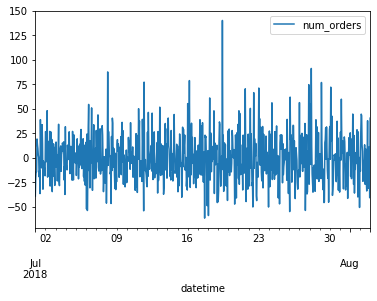

In [16]:
decomposed.resid['2018-07-01':'2018-08-02'].plot(ax=plt.gca())

Шум есть.

Анализ сезонности

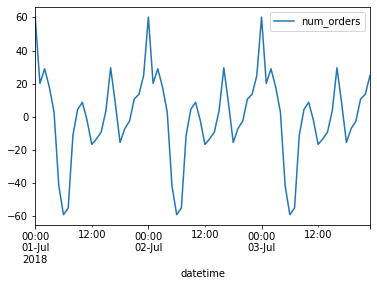

In [17]:
decomposed.seasonal['2018-07-01':'2018-07-03'].plot(ax=plt.gca())

Хорошо прослеживается сезонность загрузки такси. с 6 утра до 12 ночи пилообразно растет и потом с 12 ночи до 6 утра резко падает 

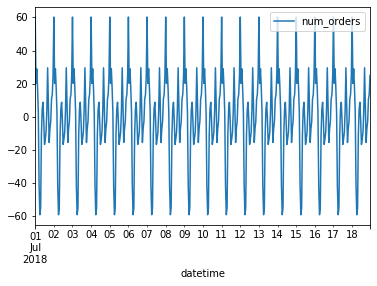

In [18]:
decomposed.seasonal['2018-07-01':'2018-07-18'].plot(ax=plt.gca())

Анализ тренда

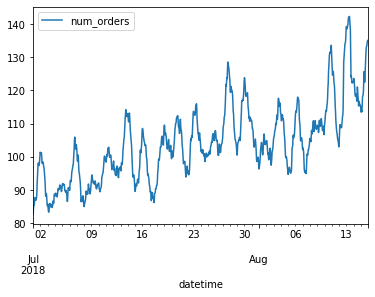

In [19]:
decomposed.trend['2018-07-01':'2018-08-15'].plot(ax=plt.gca())

Виднен явный тренд на увелечение кол-ва заказов с течением времени. К гадалке не ходи временной ряд нестационарный. Но лучше проведем статистический тест и проверим это.

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
    <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
</font>
<font color='green'><br>
Исследование - понятно.<br>
Инструмент декомпозиции в частности, а графический анализ временных рядов как в принципе - важный этап моделирования рядов.<br> Позволяет увидеть продажи визуально, а это помогает сделать предвариетльные выводы<br>
    
Хочу озвучить ещё такой момент<br>
Дело в том, в реальности бизнеса есть все три вида сезонности:<br>
1) дневная сезонность есть - ведь данные собраны по дням, т.е. будни и выходные имеют разные продажи<br>
2) внутрисуточная сезонность: когда продажи утром отличаются от продаж вечером <br>
3) месячная сезонность: когда продажи лета и осени - разные.<br><br>
И если строить прогноз на длительный период времени, то без учёта всех видов сезонности  - не обойтись<br>
Например: есть в данных восходящий тренд. Но вопрос такой возникает: <br>
этот подъём действительно за счёт роста компании (чаще всего тренд - это отражение роста компании) или есть ещё влияние месячной сезнности? (летом - продаж в рост, например, и именно этот момент мы наблюдаем в данных)<br>
Ответ на вопрос - не протой на имеющихся данных - у нас данных меньше года. А это означает, что месячную сезонность нам не просто вычислить адекватно - т.е. не внести в модель корректтировки месяцев(<br>
Поэтому, я бы дал такой совет:<br>
на горизонте прогнозирования - несколько часов или дней - можно предположить что у нас тренд.<br>
А если строить прогноз на несколько недель - вот тут утверждать наличие тренда надо с большой осторожностью))))<br><br>
Ну, а если вернуться к постановке задаче - построить прогноз на час (очень маленький горизонт), то двух сезонности может и хватить.

In [20]:
df_hh=df_h.copy()

In [21]:
df_hh['mean'] = df_hh['num_orders'].rolling(20).mean()
df_hh['std'] =df_hh['num_orders'].rolling(20).std()

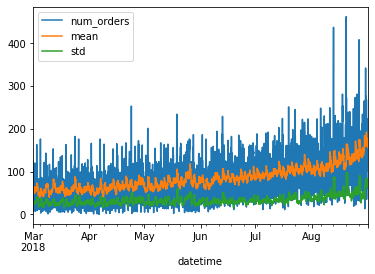

In [22]:
df_hh.plot()

Скользящее среднее и скользящщая СКО тоже имеют тренд на рост (СКО чуть чуть имеет) 

проверка стационарности временного ряда

In [23]:
df_h

,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43
...,...
2018-08-31 19:00:00,136
2018-08-31 20:00:00,154
2018-08-31 21:00:00,159


In [24]:
p=adfuller(df_h['num_orders'], autolag='AIC')[1]
if p>0.01:
    print('Нестационарный')
else:
    print('Стационарный')

Нестационарный


<div style="background:  #cceeaa;; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
<u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
</font>
<font color='red'><br>упс( не работает

<div style="background: #c4cff5; padding: 5px; border: 1px solid blue; border-radius: 5px;">
<font color='blue'> 
<u>КОММЕНТАРИЙ СТУДЕНТА</u>
</font>
<font color='blue'><br>Работает!!!!

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА 2</u></b>
</font>
<font color='green'><br>
работает)

Чтобы избавиться от нестационарности продифференцируем наш временной ряд

In [25]:
df_h_diff = df_h.diff(periods=1).dropna()


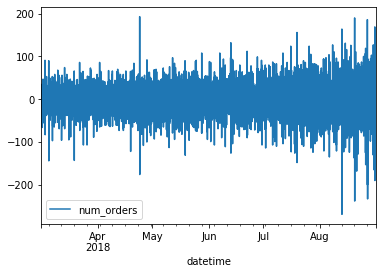

In [26]:
df_h_diff.plot()

In [27]:
p = adfuller(df_h_diff['num_orders'], autolag='AIC')[1]
if p>0.01:
    print('Нестационарный')
else:
    print('Стационарный')

Стационарный


In [28]:
decomposed_norm = seasonal_decompose(df_h_diff['num_orders']) 

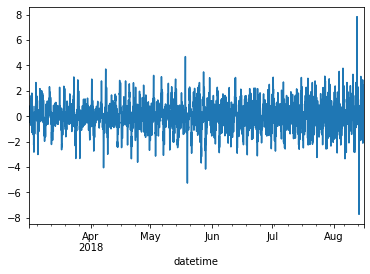

In [29]:
decomposed_norm.trend['2018-02-01':'2018-08-15'].plot(ax=plt.gca())

Так-то лучше, тренд ушел, статистический тест сказал нам, что ряд стационарен, можно обучать модель.

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
<u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
</font>
<font color='green'><br>
Есть три вида нестационарности: тренд, сезонность, непостоянство дисперсии)<br>
Стационарный ряд - это когда ничего из перечисленного в ряде не наблюдается (очистили его). Нужно это для одного из методов прогрнозироваия АРИМА, например. Для нашегго метода прогнозирования (регрессия) это понятие можно не использовать.

## Обучение

Для построения нашей предсказательной модели опробуем 3 алгоритма (ARIMA,LinearRegression,LGBMRegressor) и выберем из них лучший 

Сводная таблица результатов обучения 

In [30]:
full_inf = pd.DataFrame(data=np.nan, columns = ['RMSE'], index=['SARIMAX','LinearRegression','LGBMRegressor', 'mean'] )

SARIMAX

Подбор оптимальных параметров p,d,q

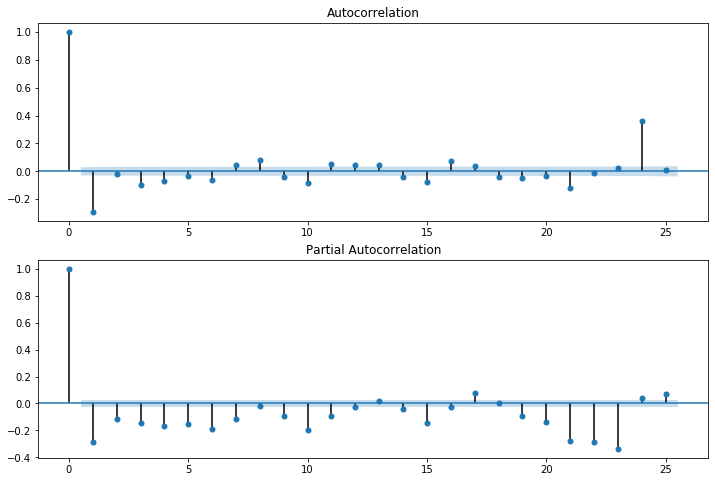

In [31]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_h_diff['num_orders'].values.squeeze(), lags=25, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_h_diff['num_orders'], lags=25, ax=ax2)

Оптимально: p=1 q=1 d=1

In [32]:
train, test = train_test_split(df_h, shuffle=False, test_size=0.1)

In [33]:
model = sm.tsa.SARIMAX(train, order=(1,1,1),seasonal_order=(4,1,6,6), initialization='approximate_diffuse' ,freq='H').fit()

/opt/conda/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [34]:
test.index.min()

Timestamp('2018-08-13 14:00:00')

In [35]:
pred = model.predict(test.index.min(),test.index.max(), typ='levels')
#trn = df_h['2018-08-31 21:00:00':]
#r2 = r2_score(trn, pred)
#print ('R^2: %1.2f' % r2)

In [36]:
print('RMSE SARIMAX:',metrics.rmse(test,pred))

RMSE SARIMAX: 69.25863184244004


In [37]:
full_inf.loc['SARIMAX', 'RMSE'] =metrics.rmse(test,pred)

Text(0.5, 1.0, 'SARIMAX')

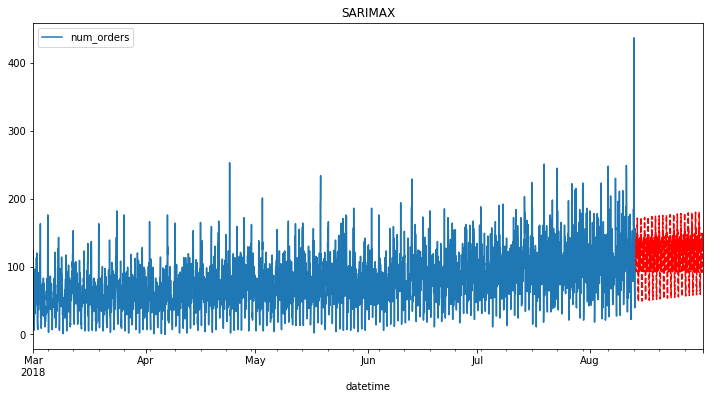

In [38]:
train.plot(figsize=(12,6))
pred.plot(style='r--')
plt.title('SARIMAX')

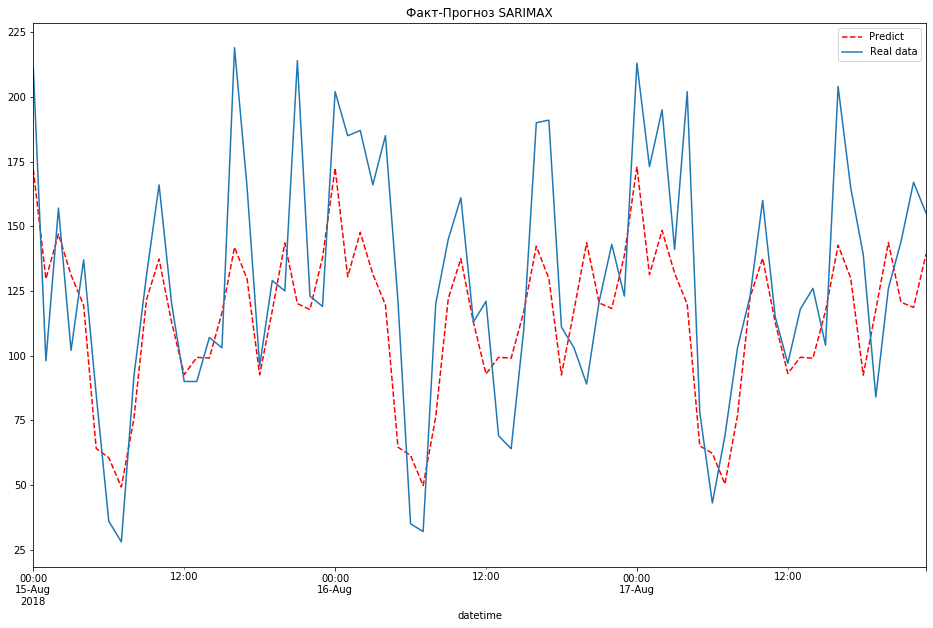

In [39]:
pred.to_frame()[0]['2018-08-15':'2018-08-17'].plot(style='r--',label='Predict',figsize=(16,10))
test['num_orders']['2018-08-15':'2018-08-17'].plot(label='Real data',figsize=(16,10))
plt.legend()
plt.title('Факт-Прогноз SARIMAX')
plt.show()

<div style="background: #ffeeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
<u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
</font>
<font color='green'><br>
Это прогноз ввиде тренда (красный пунктир)? т.е. сезонности не подключились...<br>
Есть ещё три параметра сезонности. А в модели их нет, поэтому и линия прямая, скорее всего)

<div style="background: #c4cff5; padding: 5px; border: 1px solid blue; border-radius: 5px;">
<font color='blue'> 
<u>КОММЕНТАРИЙ СТУДЕНТА</u>
</font>
<font color='blue'><br>Поподбирал различные парметры. Получил +- похожий тренд, но, к сожалению, RMSE ухудшился. Можно было сделать конечно матричный перебор параметров, но эта приблуда очень долго считается.( 

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА 2</u></b>
</font>
<font color='green'><br>
дааа, арима она вся в этом - не просто с параметрами определиться)

LinearRegression

Подбор количества признаков задержек и окна для признака скользяшщего среднего для обучение модели на основе линейной регрессии

In [40]:
r= pd.DataFrame(columns=['i','k','rmse_train','rmse_test'])

Функция расчета фитч лагов и скользящего среднего.

In [41]:
def make_features(data, max_lag, rolling_mean_size):
    data_c = data.copy()
    data_c['hour'] = data_c.index.hour
    data_c['dayofweek'] = data_c.index.dayofweek
    
    for lag in range(1, max_lag + 1):
        data_c['lag_{}'.format(lag)] = data_c['num_orders'].shift(lag)

    data_c['rolling_mean'] = data_c['num_orders'].shift().rolling(rolling_mean_size).mean()
    return data_c


<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
    <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
</font>
<font color='red'><br>
На мой взгляд: не все факторы подходят, чисто логически. Выскажу свою позицию:<br><br>

1) Фактор год: НЕТ, однозначно не подходит. У нас данных меньше года. Поэтому будет просто константа.<br>
2) Фактор месяц: НЕТ, аналогично году, у нас в истории всего один март, май.... Да и горизоно прогноза - часы. Поэтому сезонность времени года будет просто в тренде уже заложена.<br>
3) Фактор день: НЕТ, также не подходит, будет просто последовательность чисел<br>
4) Фактор день недели: ДА, т.к. у нас есть недельная сезонность<br>
5) Фактор час: ДА, т.к. есть часовая (суточная) сезонность.<br>
6) Факто lag: ДА, это параметр авторегрессии - учёт влияния вчерашних событий на сегодняшние.<br>
7) Фактор rolling: ДА, это аналог тренда. Чем больше окно сглаживания, тем ровнее линия тренда <br>

Как ты думаешь?

<div style="background: #c4cff5; padding: 5px; border: 1px solid blue; border-radius: 5px;">
<font color='blue'> 
<u>КОММЕНТАРИЙ СТУДЕНТА</u>
</font>
<font color='blue'><br>Согласен, что бездумно брать код из тренажера плохо.(

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА 2</u></b>
</font>
<font color='green'><br>
:)

Подбор лучшего количества фитч

In [42]:
df_h_c = df_h.copy()

In [43]:

for i in range(1,20):
    for k in range(1,20):
        v = make_features(df_h_c,i, k)

        train, test = train_test_split(v, shuffle=False, test_size=0.1,random_state=1234)
        train = train.dropna()
        X_train = train.drop('num_orders',axis=1)
        y_train = train['num_orders']
        X_test = test.drop('num_orders',axis=1)
        y_test = test['num_orders']
        model = LinearRegression()
        model.fit(X_train,y_train)
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)
        d = mean_absolute_error(y_train,y_pred_train)
        c = mean_absolute_error(y_test,y_pred_test)
        arr = np.array([i,k,d,c])
        df_length = len(r)
        r.loc[df_length] = arr

In [44]:
r[r['rmse_test']==r['rmse_test'].min()]

,i,k,rmse_train,rmse_test
322,17.0,19.0,22.86964,39.586229


Лучшая модель на основе LinearRegression была получена с 2 фитчами лагов и с периодом скользящего среднего = 3

In [45]:
df_h_c = df_h.copy()

In [46]:
n = make_features(df_h_c,17, 19)


<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
    <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
<font color='green'>Пару строк по фактору лаг и скользящее среднее:<br>
Lag: его называют ещё параметром авторегрессии. На бытовом уровне его можно понять так: допустим вчера мы собрались с друзьями и не много закусили.... повлияет ли это на сегодняшний настрой на жизнь? Скорее да)))) Так вот с авторегрессией также. Допустим lag=1 - учитывает (для удобства будем считать, что продажи собраны по дням) как вчерашние продажи - вчерашние события - воалияли на сегоняшние.Lag=2: учитывает как позавчерашние продажи влияютна сегодняшние.....<br>
       
По скользящему среднего:<br>
Предположим rolling=10 - скользящее среднее. По сути, ищем среднее по 10 точкам, потом следующие 10 точек, и т.д. - это некое подобие тренда будет - средней линии. Т.е. - сглаживание колебаний/выбросов. Это легко увидеть на пределе: допустим длина ряда 100 дней. rolling(100) - это просто одно число - среднее всего ряда. <br>
    
Поэтому, если выставить сезонности - hour и деньНедели, то дополнительные факторы могут быть такие: лаг =1 (максимум 2), а скользящее среднее = 24 (среднее за сутки). Т.е. начинать с этого. В итоге модель будет приемлемая по точности и не много факторов.. а это значит и для бизнеса будет легче доносить решение)

In [47]:

train, test = train_test_split(n, shuffle=False, test_size=0.1,random_state=1234)
train = train.dropna()
X_train = train.drop('num_orders',axis=1)
y_train = train['num_orders']
X_test = test.drop('num_orders',axis=1)
y_test = test['num_orders']
model = LinearRegression()
model.fit(X_train,y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
rmse_train = mean_absolute_error(y_train,y_pred_train)
rmse_test = mean_absolute_error(y_test,y_pred_test)

In [48]:
print('LinearRegression')
print('RMSE_train:',rmse_train)
print('RMSE_test:',rmse_test)

LinearRegression
RMSE_train: 22.869640362495396
RMSE_test: 39.58622856426539


In [49]:
full_inf.loc['LinearRegression', 'RMSE'] =rmse_test

In [50]:
pred = pd.DataFrame(columns=['fg'], index =X_test.index, data=y_pred_test )

In [51]:
train.index.min()

Timestamp('2018-03-01 19:00:00')

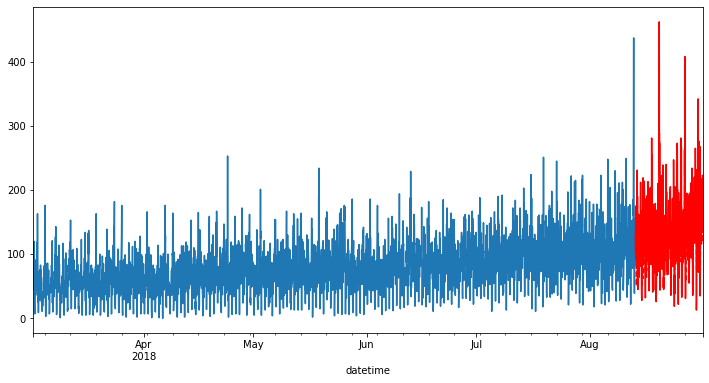

In [52]:
train['num_orders'].plot(figsize=(12,6))
pred['fg'].plot(style='r--')
test['num_orders'].plot(style='r')

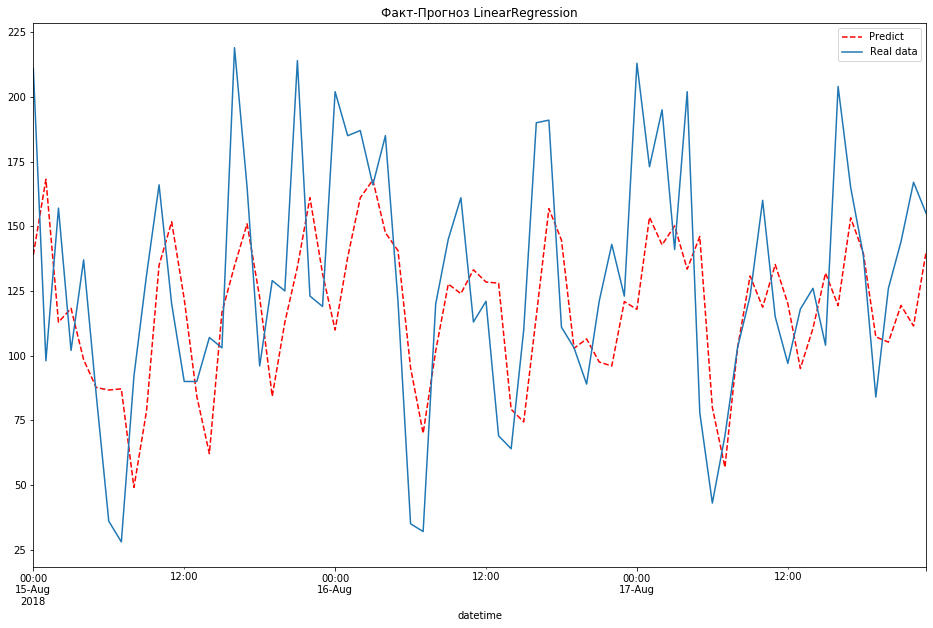

In [53]:
pred['fg']['2018-08-15':'2018-08-17'].plot(style='r--',label='Predict',figsize=(16,10))
test['num_orders']['2018-08-15':'2018-08-17'].plot(label='Real data',figsize=(16,10))
plt.legend()
plt.title('Факт-Прогноз LinearRegression')
plt.show()

Выглядит +- правдоподобно

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
    <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
<font color='green'>Как минимум - красиво)<br>
А правдоподобно ли - тут лучше наложить факт-прогноз на одном графике - будет графически видна величина ошибки)

LGBMRegressor

In [54]:
q= pd.DataFrame(columns=['i','k','rmse_train','rmse_test'])

In [55]:
df_h_c = df_h.copy()

In [56]:

v = make_features(df_h,300, 2)

train, test = train_test_split(v, shuffle=False, test_size=0.1)
train = train.dropna()
X_train = train.drop('num_orders',axis=1)
y_train = train['num_orders']
X_test = test.drop('num_orders',axis=1)
y_test = test['num_orders']
model = lgb.LGBMRegressor(max_depth=9, n_estimators=50)
model.fit(X_train,y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
d = mean_absolute_error(y_train,y_pred_train)
c = mean_absolute_error(y_test,y_pred_test)
arr = np.array([2,3,d,c])
df_length = len(q)
q.loc[df_length] = arr

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
    <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
<font color='green'>Это 300  новых столбцов - факторы лаг?

In [57]:
print('LGBMRegressor')
print('RMSE_train:',d)
print('RMSE_test:',c)

LGBMRegressor
RMSE_train: 9.683079017435345
RMSE_test: 26.982295649929522


In [58]:
full_inf.loc['LGBMRegressor', 'RMSE'] =c 

In [59]:
full_inf

,RMSE
SARIMAX,69.258632
LinearRegression,39.586229
LGBMRegressor,26.982296
mean,NaN


In [60]:
pred = pd.DataFrame(columns=['fg'], index =X_test.index, data=y_pred_test )

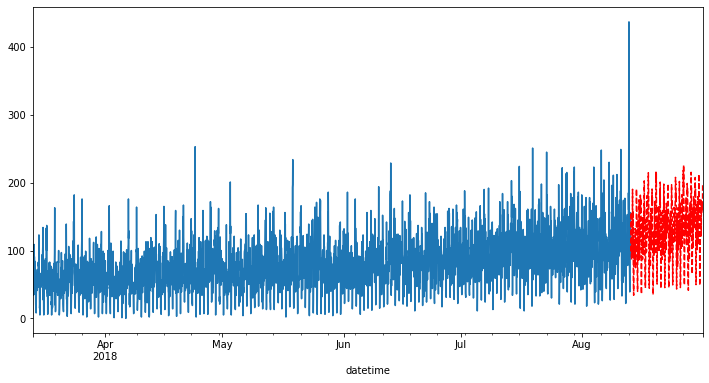

In [61]:
train['num_orders'].plot(figsize=(12,6))
pred['fg'].plot(style='r--')

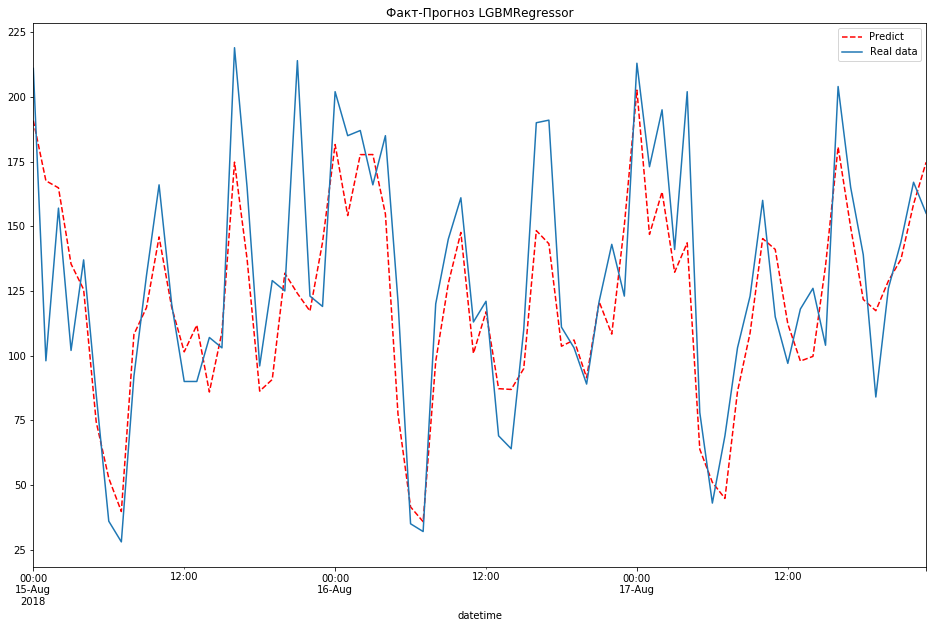

In [62]:
pred['fg']['2018-08-15':'2018-08-17'].plot(style='r--',label='Predict',figsize=(16,10))
test['num_orders']['2018-08-15':'2018-08-17'].plot(label='Real data',figsize=(16,10))
plt.legend()
plt.title('Факт-Прогноз LGBMRegressor')
plt.show()

## Тестирование

Проверка модели, которая предсказывает только среднее

In [63]:
train, test = train_test_split(v, shuffle=False, test_size=0.1)

In [64]:
pred_mean = pd.DataFrame(data=train['num_orders'].mean(),index=test.index, columns=['num_orders'])


In [65]:
rmse_mean = mean_absolute_error(test['num_orders'],pred_mean)
print('RMSE mean',rmse_mean)

RMSE mean 68.35387826300818


In [66]:
full_inf.loc['mean', 'RMSE'] =rmse_mean

In [67]:
full_inf

,RMSE
SARIMAX,69.258632
LinearRegression,39.586229
LGBMRegressor,26.982296
mean,68.353878


Вывод: LGBMRegressor с большой кучей фитч натворил чудес. ARIMA со стандартной настройкой p d q параметров оказалась не очень эффективной нужен более глубокий анализ данных, чтобы получить неплохой результат на данном алгоритме. Линейная регрессия показала неплохой результат после подбора кол-ва фитч и окна скользящего среднего. При этом все модели предсказывают лучше среднего, что тоже уже неплохо и условие задачи по качеству модели выполнено.

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
<u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
</font>
<font color='green'><br>
Максим, с модельной частью справился хорошо!<br>
Видно, что этот скил уже достаточно сильный у тебя.<br>
Метрика - ОК. Но не понятно, если честно, а хороша ли эта модель в плане предсказания? Для этого лучше построить дополнительно график (чуть ниженаписал об этом).<br>
    
И если сутейно рассуждать, то временные ряды стоят особняком во всём курсе, я бы сказал. Тут чуть иная модельная философия, на мой взгляд. Имменно поэтому позволял себе оставлять большие комментарии, чтобы как-то раскрыть её особенности.<br>
    
    
По последней модели:<br>
Формально - вроде всё работает. Но на практике - скользящее среднее =2, а лагов=300 - это слабоприменимо)<br>
Почему? Постарался описать в блоке с факторами.<br>    
    
Оставил несколько комментариев в тексте - готов буду ответить на твои вопросы!<br>
<font color='red'>    
А пока попрошу тебя чуть скорректировать такие моменты:<br>
1) Если говорить об АРИМЕ. там не хватает факторов сезонности ()<br>
2) С графиками - отлично ты сделал. Это один из важнейших инструментов анализа результатов моделирования временных рядов. Только сейчас он показывает общую тенденцию - построена ли модель. Но деталей - хорошо ли построилась - не видно. Выведи, пожалуйста, графики факт/предсказанное на одном рисунке (обычный линейный график) так, чтобы увидеть где основные не "попадалки" модели. <br>
Т.е. надо выбрать масштаб, скажем, несколько дней, чтобы увиеть можно было и сравнить каждый час.<br>  
        
<font color='green'>
Спасибо)<BR>
БУДУ ЖДАТЬ КОММЕНТАРИЕВ

## Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке исполнения
- [ ]  Данные загружены и подготовлены
- [ ]  Данные проанализированы
- [ ]  Модель обучена, гиперпараметры подобраны
- [ ]  Качество моделей проверено, выводы сделаны
- [ ]  Значение *RMSE* на тестовой выборке не больше 48

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
<u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
</font>
<font color='green'><br>
Хотел бы оставить несколько идей для твоих будущих проектов в этой обоасти<br>

На мой взгляд, в этой теме (временные ряды) главное - необходимо чувствовать исходный ряд продаж, с точки зрения бизнеса, и уже только потом подбирать к нему модели. Каждое колебание временного ряда - это деньги для бизнеса (если говорим что заказчик бизнесовый) и за "трепетами" данных прячутся разные семейства причин. И именно знание их помогут строить хорошие прогнозы..<br>.
Леса, бустинги, регрессии.... могут подобрать хорошие модели на старых данных. Но иногда, как прогноз эти, модели могут оказаться пустышками - не интересными бизнесу. <br>  <br>
Поэтому, от себя позволю добавить несколько идей:<br>
Очень часто ищут "волшебную таблетку" или "кнопку". Нажал и само всё построилось с высокой точностью<br>
Но такого никогода не будет)))<br>
И причиной тому: модели нужно подсказать причины, по которым происходит колебания продаж (временного ряда): понимать причины колебаний треда, понимать аномалии, учитывать акционные продажи, видеть действия конкурентов , закладывать их в модель и т.д. <br><br>
В общем, всё как обычно - три группы факторов: <br>
1)внешние факторы (например выручка такси-компании зависит от количества машин на линии),<br>
2)есть факторы внутри самих данных (Вы использовали как раз поняти лаг, сезонности), <br>
3)есть параметры самих моделей (то, что обычно используется при моделировании леса или деревьев).<br><br>

Ещё важно иметь ввиду горизонт прогноза: на кокой период строить прогноз нужно  - на час вперёд, на неделю, на месяц.<br>
Это также накладывает ограничения на подбор моделей<br>
Я бы рекомендовал Вам составить для себя матрицу  в разрезе: <br>
а)есть тренд/нет тренда; <br>
б)еть сезоннотсь/нет сезонности; <br>
в)какой горизонт прогноза требуется; <br>
г) есть ли у нас дополнительные факторы для модей<br>
На пересечении знаний о моделях легко будет подобрать адкватную модель.
Не все задачи прогнозирования временных рядов можно хорошо решить лесом и еже с ним на основе знаний только факторов ряда... Они хорошо подойдут для коротких горизонтов прогнозирования.... А если горизонт чуть больше: недели, месяцы... то тут надо подключать понимания фаткоров продаж самого бизнеса.

<div style="background: #c4cff5; padding: 5px; border: 1px solid blue; border-radius: 5px;">
<font color='blue'> 
<u>КОММЕНТАРИЙ СТУДЕНТА</u>
</font>
<font color='blue'><br>Спасибо за совет!

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
    <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА 2</u></b>
</font>
<font color='green'><br>Привет, Максим!<br>
ОК, рад, если что-то "легло":) и поможет в будщем.<br>

Если будет возможность тебе однозначно интересно посмотреть разные практические истории вот здесь:<br>
https://ibf.org/knowledge - заморский институт бизнес-прогнозирования.<br>
Там и статьи можно накопать, и методы посмомтерть...<br>

Есть классический труд (он НЕ ML, а исключительно на эксель). Но для понимания сути временных рядов - то, что надо:<br>
УИЧЕРН "Бизнес-прогнозирование"<br>

Идеологически по системе прогнозирования, интересно почитать<br>
ТОМАС УОЛЛАС, Р. СТАЛЬ "планирование продаж и операций" SO&P<br><br>     

Спасибо) УСПЕШНОГО ДАЛЬНЕЙШЕГО ОБЧЕНИЯ!